In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing train and test data set
df_train = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\bigdatamart_Train.csv")
df_test = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\bigdatamart_Test.csv")

In [3]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


Item Identifier seems to be some unique code provided to products like the the bar code so that they can get all the information about the product just by entering it into system

## EDA

In [5]:
print("No. of Rows in training dataset is :",df_train.shape[0],"\n No. of columns in training dataset is :",df_train.shape[1])

No. of Rows in training dataset is : 8523 
 No. of columns in training dataset is : 12


In [6]:
print("No. of Rows in testing dataset is :",df_test.shape[0],"\n No. of columns in testing dataset is :",df_test.shape[1])

No. of Rows in testing dataset is : 5681 
 No. of columns in testing dataset is : 11


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In training dataset we have missing values in two column i.e Item_Weight and Outlet_Size

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Now we can say that missing data in both set are in same columns

# Merging both the dataset training and testing for further Analysis

In [11]:
# Making both the dataset shape equal by adding a new column having in testing dataset having Null Values
df_test["Item_Outlet_Sales"]=np.nan

df_train["data"]="train"
df_test["data"]="test"
df_test = df_test[df_train.columns]

In [12]:
df = pd.concat([df_train,df_test],axis=0) # Creating new dataframe by merging noth of them testing and Training
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Further Analysis is done on new Dataset :

**Checking the Missing Values in dataset once again**

As we can see in Below graph we can see clearly that there is only two columns which has missing data and the last columns is the column we add it testing dataset by making it equal

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

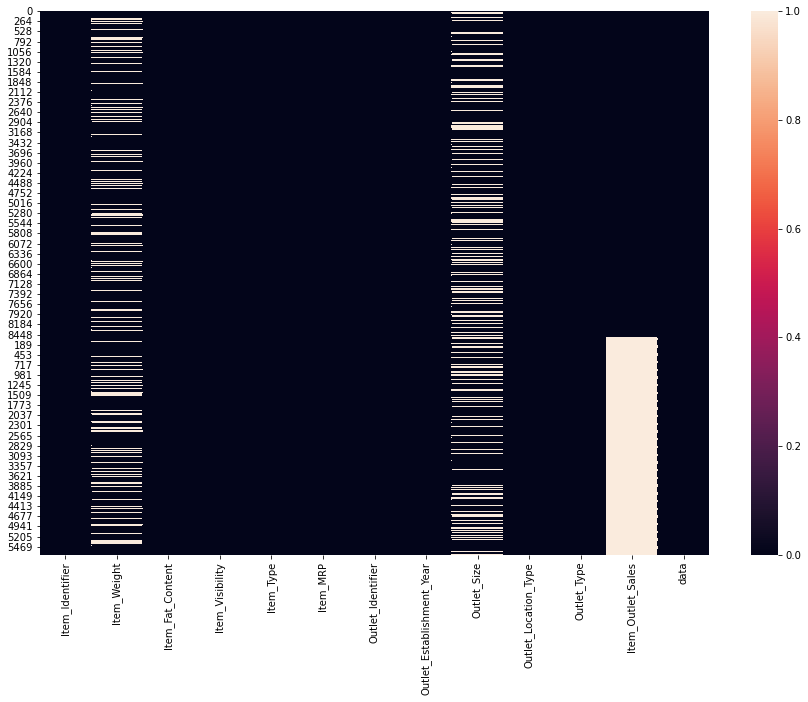

In [14]:
# checking the null Values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [15]:
df.isin([0]).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              879
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
data                           0
dtype: int64

Item_visibility has 879 Zero in it. Need to think whether any product present in any supermarket has 0 visibility

In [16]:
df.count()

Item_Identifier              14204
Item_Weight                  11765
Item_Fat_Content             14204
Item_Visibility              14204
Item_Type                    14204
Item_MRP                     14204
Outlet_Identifier            14204
Outlet_Establishment_Year    14204
Outlet_Size                  10188
Outlet_Location_Type         14204
Outlet_Type                  14204
Item_Outlet_Sales             8523
data                         14204
dtype: int64

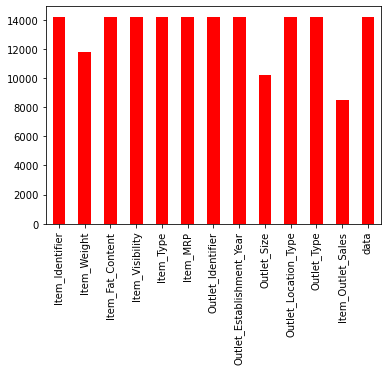

In [17]:
df.count().plot.bar(color="r")
plt.show()

There is columns Item_weights and Outlet_size both of them having missing data in their columns

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From above statistics we can say that their is skewness in the data in Item_Visibility, Item_MRP and Item_Outlet_Sales

* Item_Outlet_sales is our target column so I am not removing any skewness from it

## Univariate Analysis

In [19]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

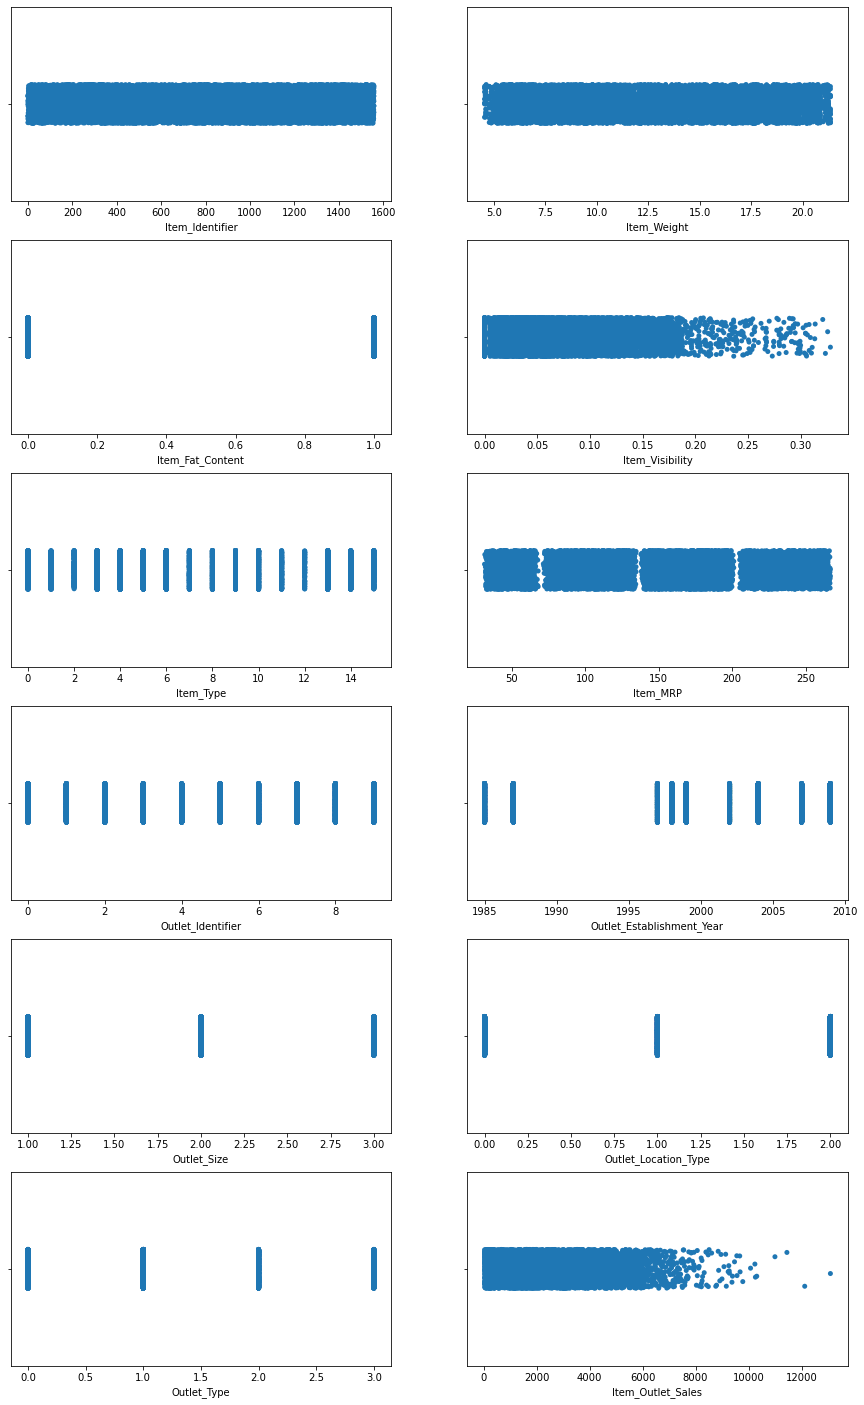

In [46]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.stripplot(df[i])
        plotnumber+=1
plt.show()

<AxesSubplot:>

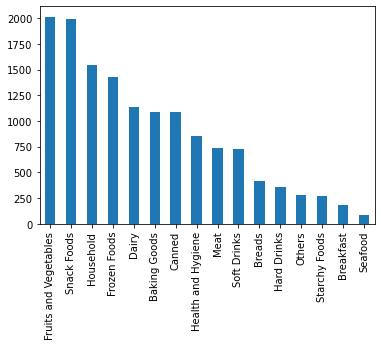

In [20]:
df["Item_Type"].value_counts().plot.bar()

In [21]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

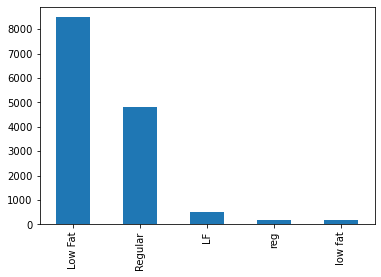

In [22]:
df["Item_Fat_Content"].value_counts().plot.bar()

There are only two categories One is Low Fat and another one is Regular. This two category may be written in LF, low fat as Low Fat and reg as Regular. Need to check renaming them as well may be they can affect the accuracy

In [23]:
df.nunique().sort_values()

data                             2
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Fat_Content                 5
Outlet_Establishment_Year        9
Outlet_Identifier               10
Item_Type                       16
Item_Weight                    415
Item_Identifier               1559
Item_Outlet_Sales             3493
Item_MRP                      8052
Item_Visibility              13006
dtype: int64

<AxesSubplot:>

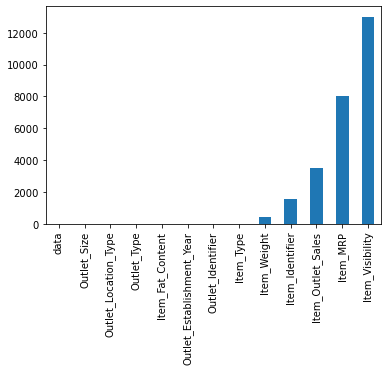

In [24]:
df.nunique().sort_values().plot.bar()

item_identifier has the large no. of missing data

<AxesSubplot:ylabel='Outlet_Type'>

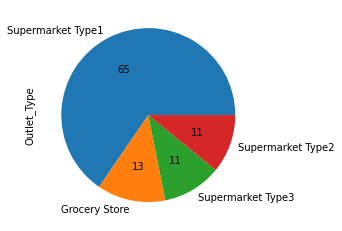

In [25]:
df["Outlet_Type"].value_counts().plot.pie(autopct="%.2g")

Types of Stores we have in Our dataset:

Supermarket Type 1 :- 65%

Grocery Store :- 13%

Supermarket Type 2 :- 11%

Supermarket Type 3 :- 13%

In [26]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

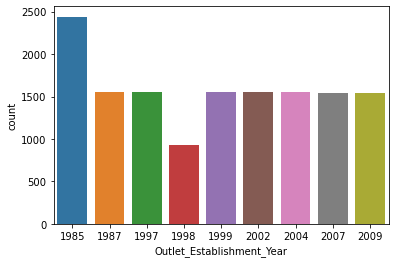

In [27]:
sns.countplot(df["Outlet_Establishment_Year"])

Most of the stores established in 1985 and then it's constant in the sucessor years except 1998. In that year less than 1000 new store start this is kind of Discrete data we need to check whether it has any relation with the data set or not

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

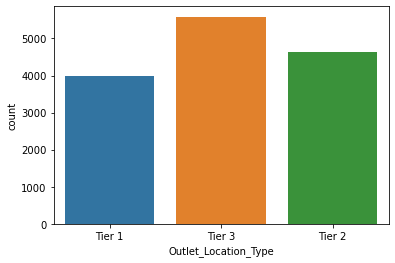

In [28]:
sns.countplot(df["Outlet_Location_Type"])

Tier 3 city has large no. of stores and Tier 1 has the less no. of stores as compare to Tier2 and Tier 3

Data seems to bo normal

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

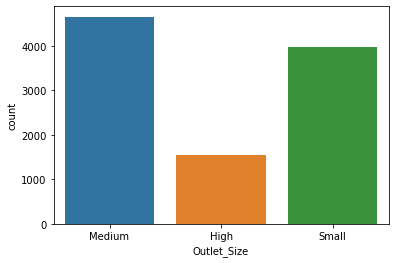

In [29]:
sns.countplot(df["Outlet_Size"])

We get the Count and Size of the stores

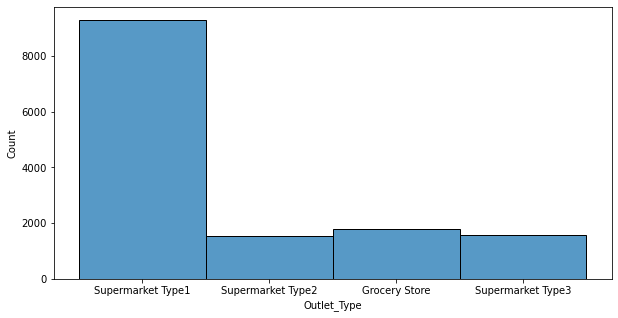

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df["Outlet_Type"])
plt.show()

The dataset has large no. of Supermarket Type 1 data and data is seems to be normal

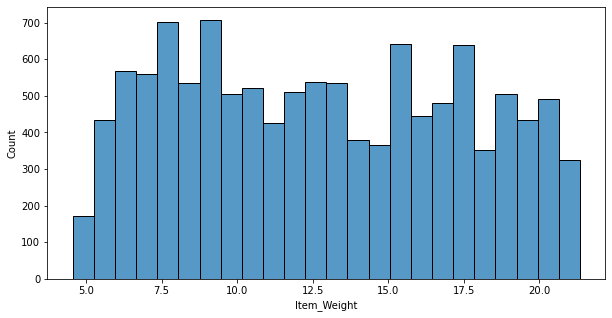

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df["Item_Weight"])
plt.show()

Seems to be guassian Distribution

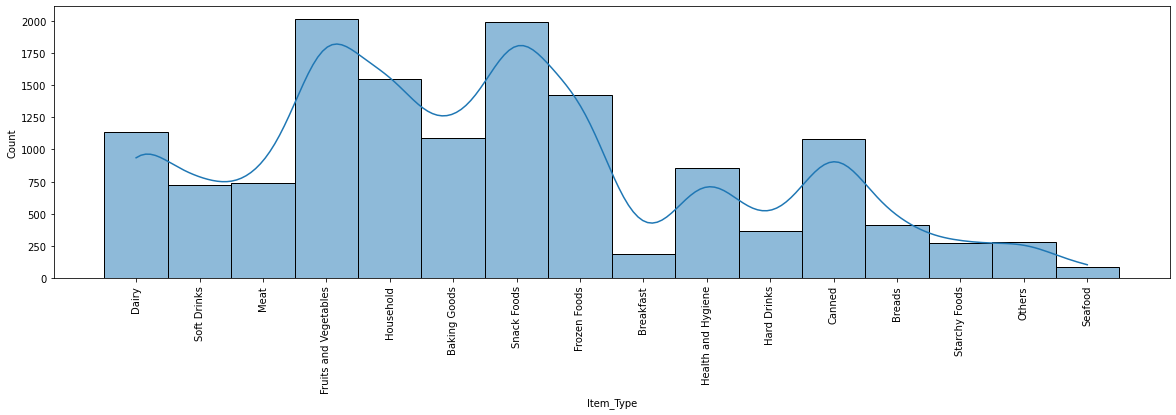

In [32]:
plt.figure(figsize=(20,5))
sns.histplot(df["Item_Type"],bins=30,kde=True)
plt.xticks(rotation=90)
plt.show()

Item Type and Their count present in the dataset. the **seafood** sale is the least. And the **data is skewed**

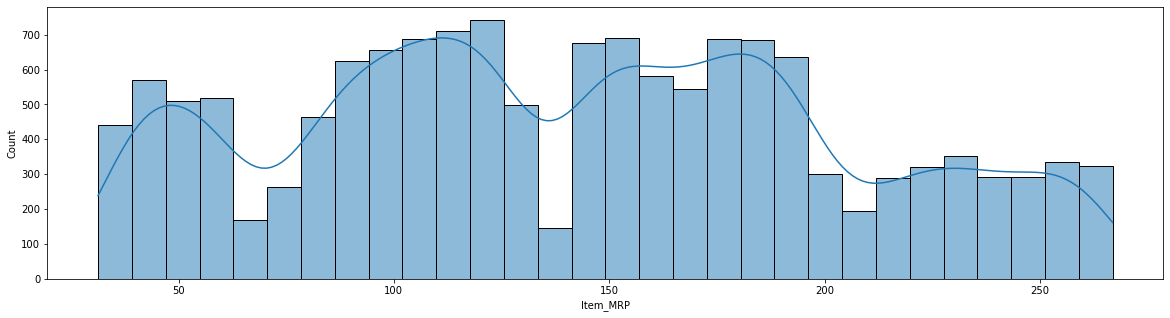

In [33]:
plt.figure(figsize=(20,5))
sns.histplot(df["Item_MRP"],bins=30,kde=True)
plt.show()

The maximum **product sold has the MRP between 100 to 150** and the distribution is look Guassian

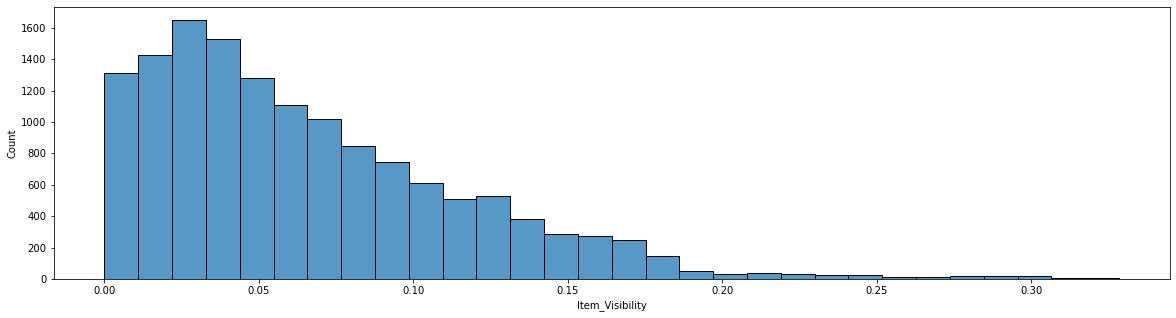

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(df["Item_Visibility"],bins=30)
plt.show()

The product visibilty is showed a little skewed

In [35]:
df.skew().to_frame()

,0
Item_Weight,0.101309
Item_Visibility,1.195175
Item_MRP,0.130728
Outlet_Establishment_Year,-0.396465
Item_Outlet_Sales,1.177531


## Bivariate Analysis

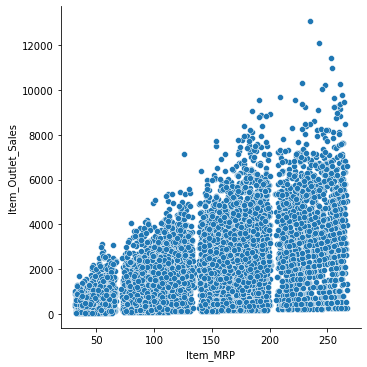

In [376]:
sns.relplot(x="Item_MRP",y="Item_Outlet_Sales",data=df)

As Item MRP increases the sales is also increases. It means it has linear relationship with Target Variable

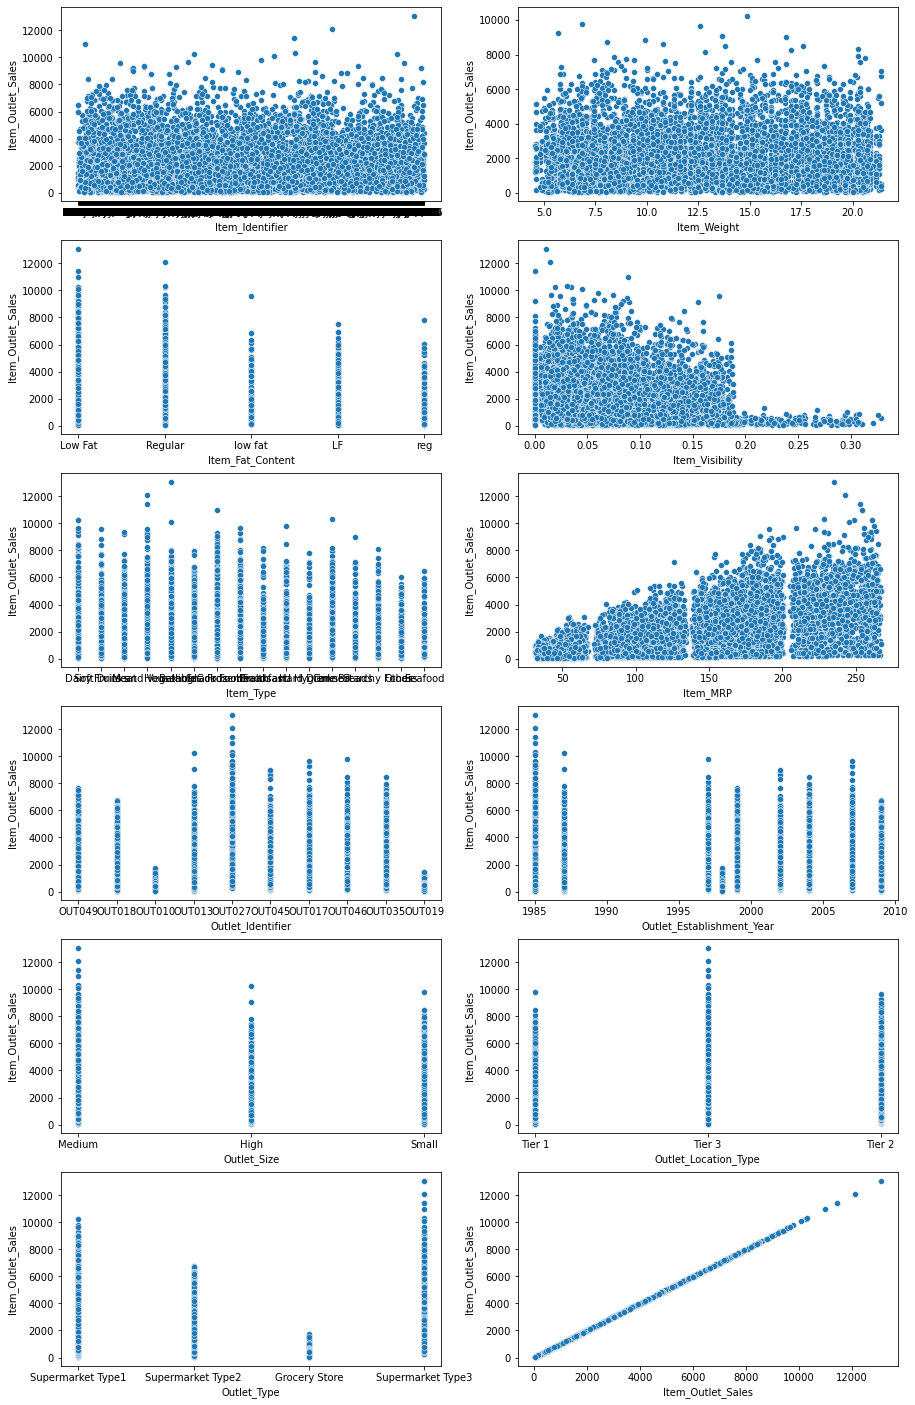

In [38]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df.Item_Outlet_Sales)
        plotnumber+=1
plt.show()

Item_MRP has some kind of linear relationship with the label and It seems Item_visibility has not linear relationship with Targetcolumn


Index is just indexing so it don't have any relation i am going to drop that column after splitting the dataset. Whereas Item_weight seems to be Constant.

Item_Fat_Content both the categories has same relation with the target variable.

Item_Type 6 has some sort of relation with target variable

Outlet_Identifier category 5 giving the maximum sales

Outlet_Size Medium gives the maximum contribution is sales

Outlet_Location_Type Tier 3 city gives the maximum sale

Outlet_Type: Grocessory store gives the least.


## Need To Encode the data For Further Analysis

In [36]:
# Replace data using .replace method
df["Outlet_Size"] = df["Outlet_Size"].replace(['Medium', "nan", 'High', 'Small'],[2,None,3,1])

Need to fill the Categorical columns first before applying any encoding or imputing techniques. Because any imputation technique won't understand the string data. It always understand only numerical data and if i apply the imputation technique without filling the data it shows error. Therefore i replace the **small, Medium, High and nan with 1,2,3 and None respectively** and filling the Further data will be handled by imputor

In [37]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

As we know Item_Fat_Content has only two categories one is Low Fat and other One is Regular which is written in differebt manner by different stores like For **Low Fat they wittten it LF,low fat** and same for **Regular they write it reg** in short. So I am going to make two group one for low fat and another one for Regular

In [38]:
# making it only two groups
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat").replace("LF","Low Fat").replace("reg","Regular")

In [39]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Using label encoder for encoding  categorical columns

In [40]:
columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']

In [41]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in df[columns]:
    df[i] = lab_enc.fit_transform(df[i])

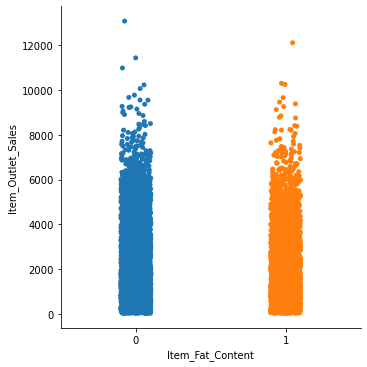

In [378]:
sns.catplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=df,hue="Item_Fat_Content")

Both of the category has the same relation with label

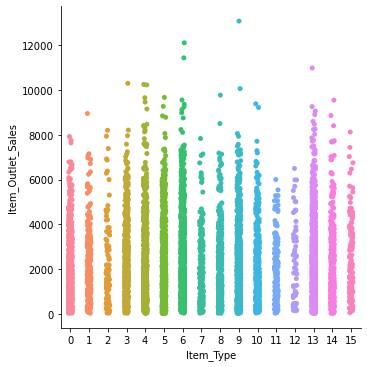

In [386]:
sns.catplot(x="Item_Type",y="Item_Outlet_Sales",data=df,hue="Item_Type")

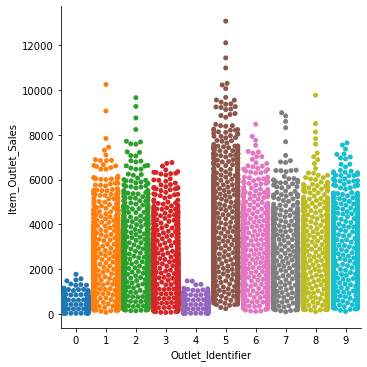

In [389]:
sns.catplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=df,hue="Outlet_Identifier",kind="swarm")

Outlet_Identifier 5 giving the most no. of sales

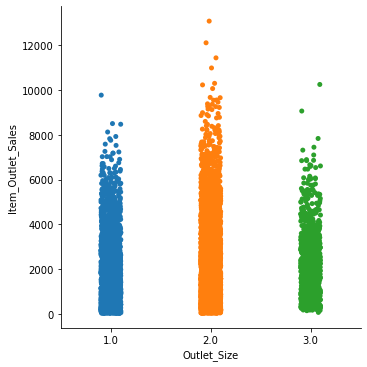

In [390]:
sns.catplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df,hue="Outlet_Size",kind="strip")

Medium Outlet_size is giving the most sales

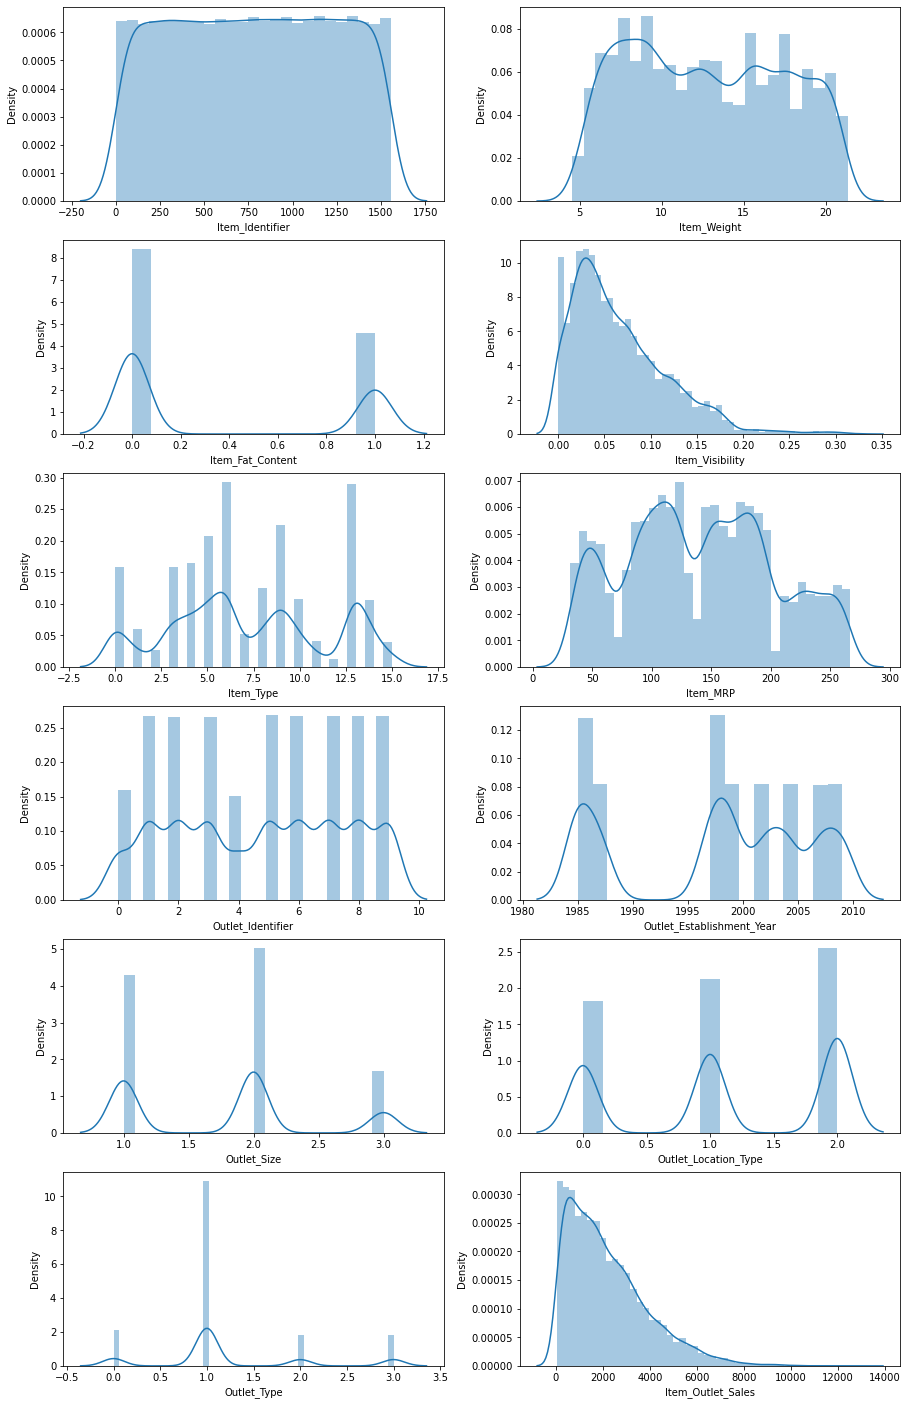

In [48]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.distplot(df[i])
        plotnumber+=1
plt.show()

There is A little Skewness in Item visibility and Item_outlet_sales. I need to take care of skewness in Item_Visibility and we are not going to touch the label column

## Multivariate Analysis

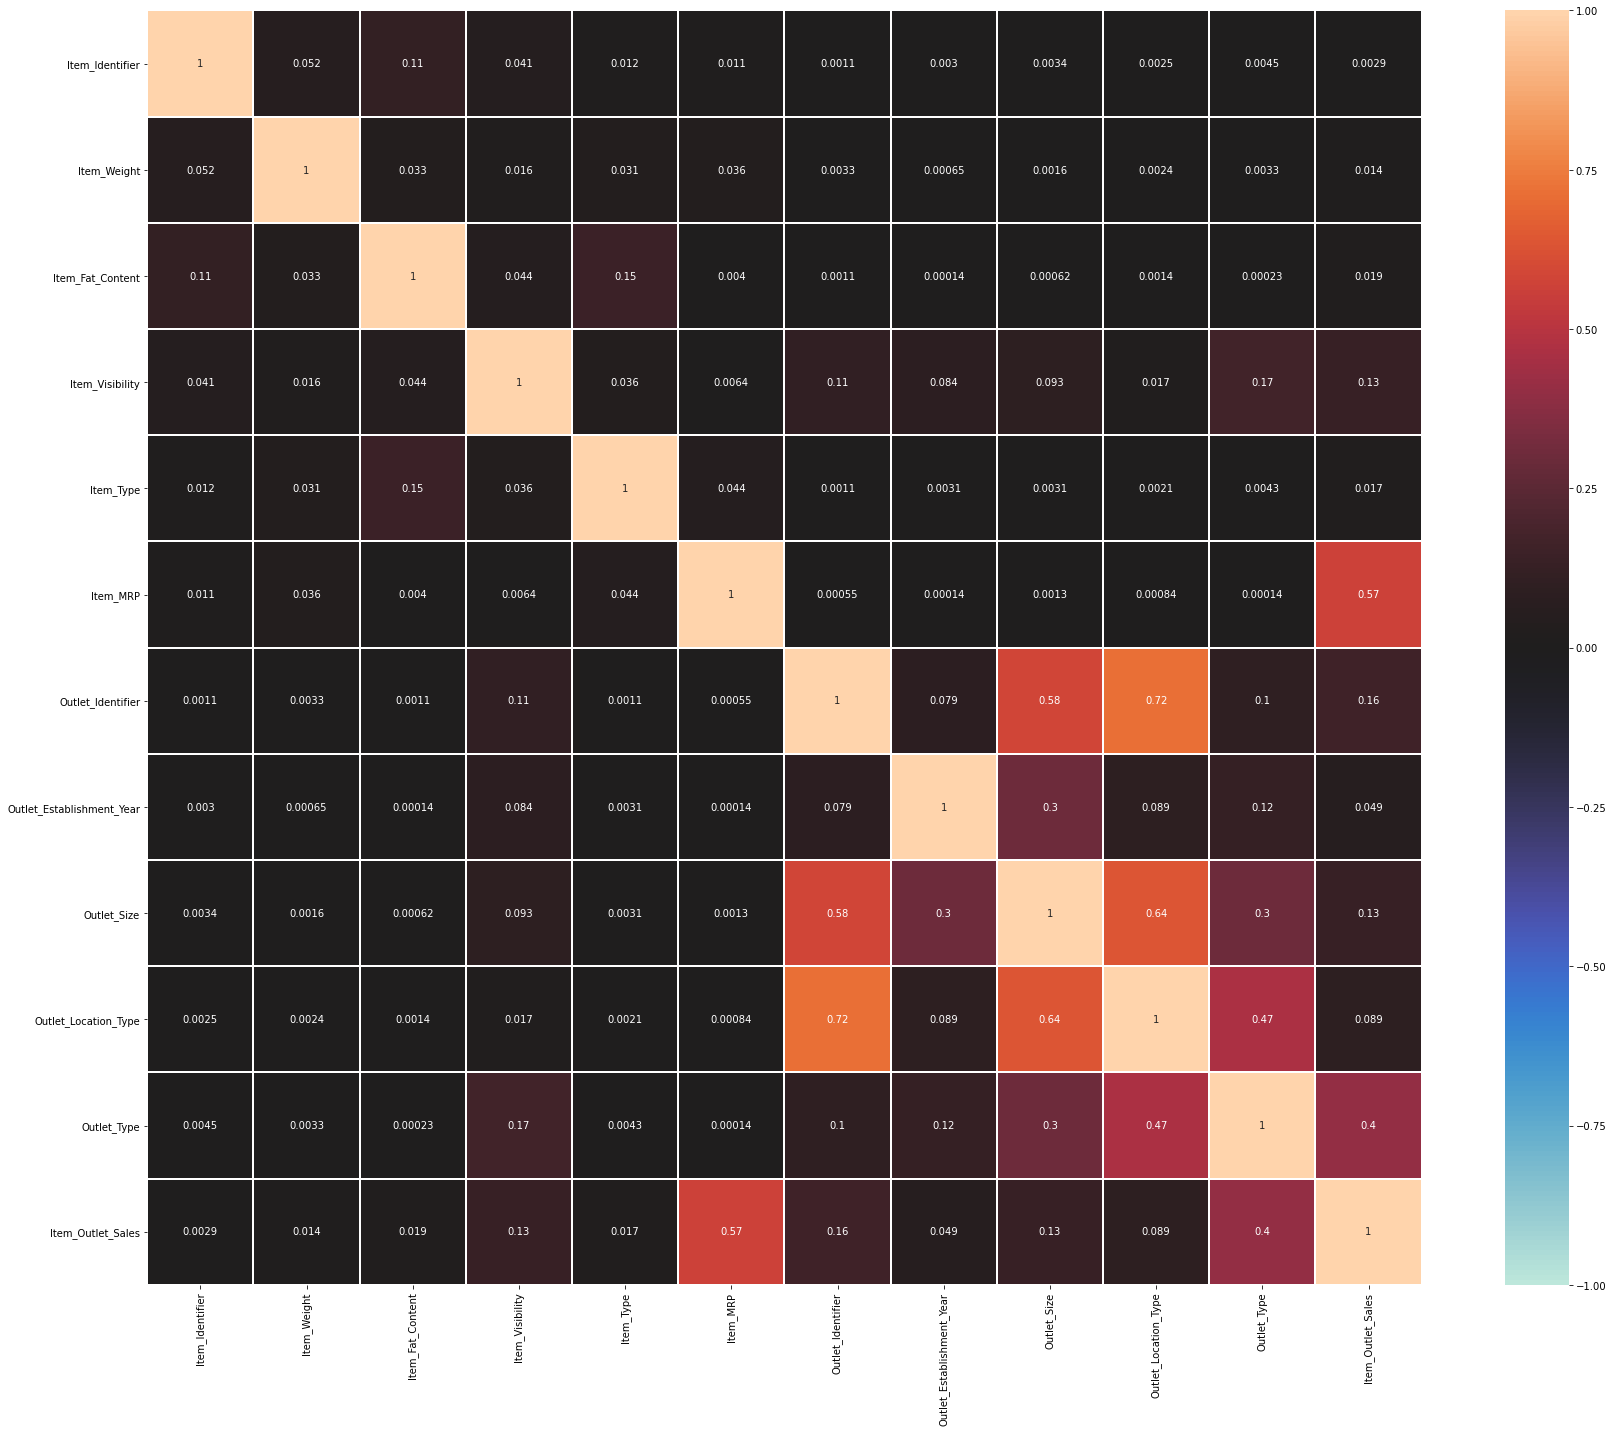

In [49]:
plt.figure(figsize=(25,20))
df_corr = df.corr().abs()
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt=".2g",linewidth=1)

plt.tight_layout()

From above graph we can say that their is no particular feature which has strong correlation with label. The strongest correlation Target column has with Outlet_Type and Item_MRP

From Above map we can say that:
Outlet_Location_Type and Outlet_Identifier has a good Multicolinearity approx 72% between them We need to check it.<br>

Outlet_Size and Outlet_Identifier also has a 58 % Multicolinearity which do not affect much but still need to make sure.<br>

Outlet type and Outlet_Identifier has some sort of multicolinearity.

Outlier_Establishment_Year has some sort of Relation with Outlet_Type


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

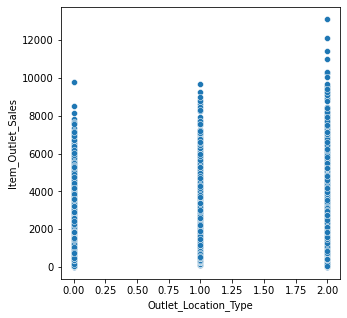

In [50]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["Outlet_Location_Type"],df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

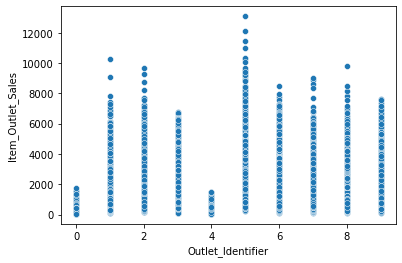

In [51]:
sns.scatterplot(df["Outlet_Identifier"],df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

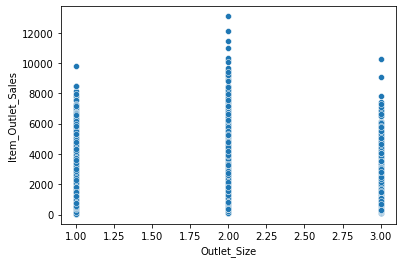

In [52]:
sns.scatterplot(df["Outlet_Size"],df.Item_Outlet_Sales)

All of them has share same relation we check first taking features and then removing it Whether removing them effect the model. Remaining also has a Multicolinearity but it's weak

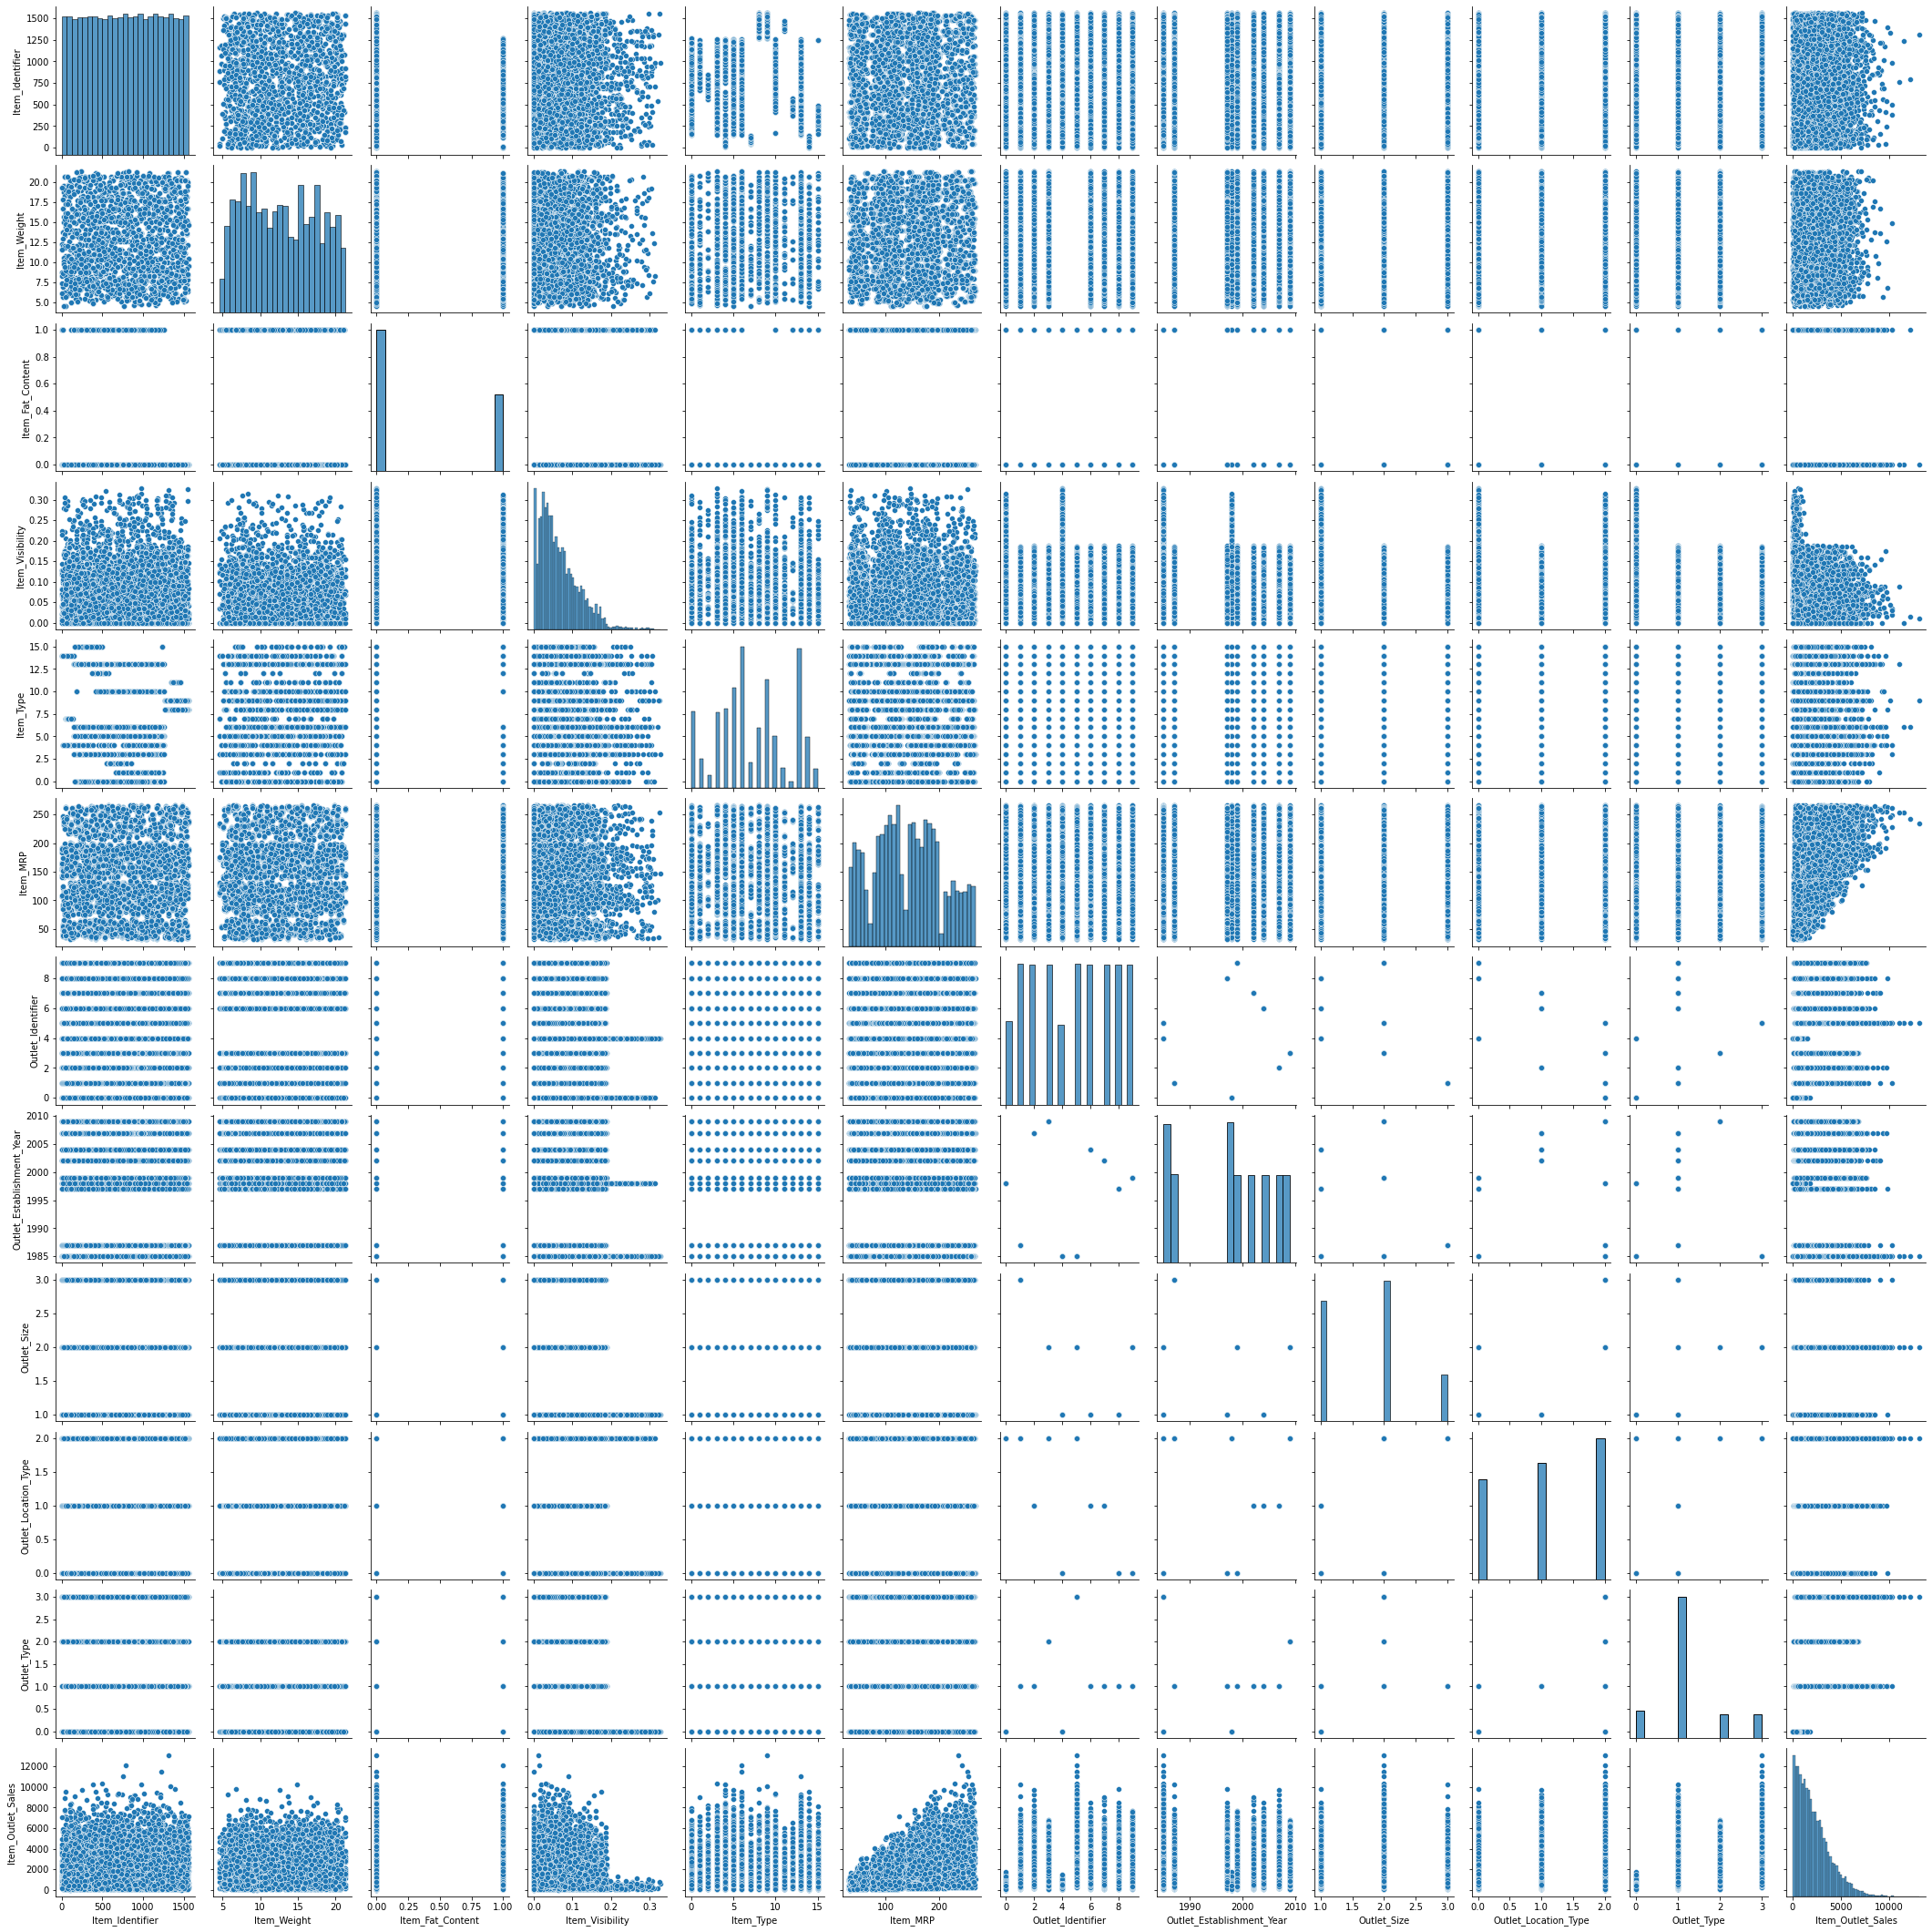

In [53]:
sns.pairplot(df)

In [54]:
df.corr()["Item_Outlet_Sales"]

Item_Identifier              0.002869
Item_Weight                  0.014123
Item_Fat_Content             0.018719
Item_Visibility             -0.128625
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Identifier            0.162325
Outlet_Establishment_Year   -0.049135
Outlet_Size                  0.129076
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Item_type, Item_Identifier_1, Item_Identifier_2 has the least correlation

## Data Cleaning

In [55]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [56]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

### Replacing Zero in Item_Visibilty

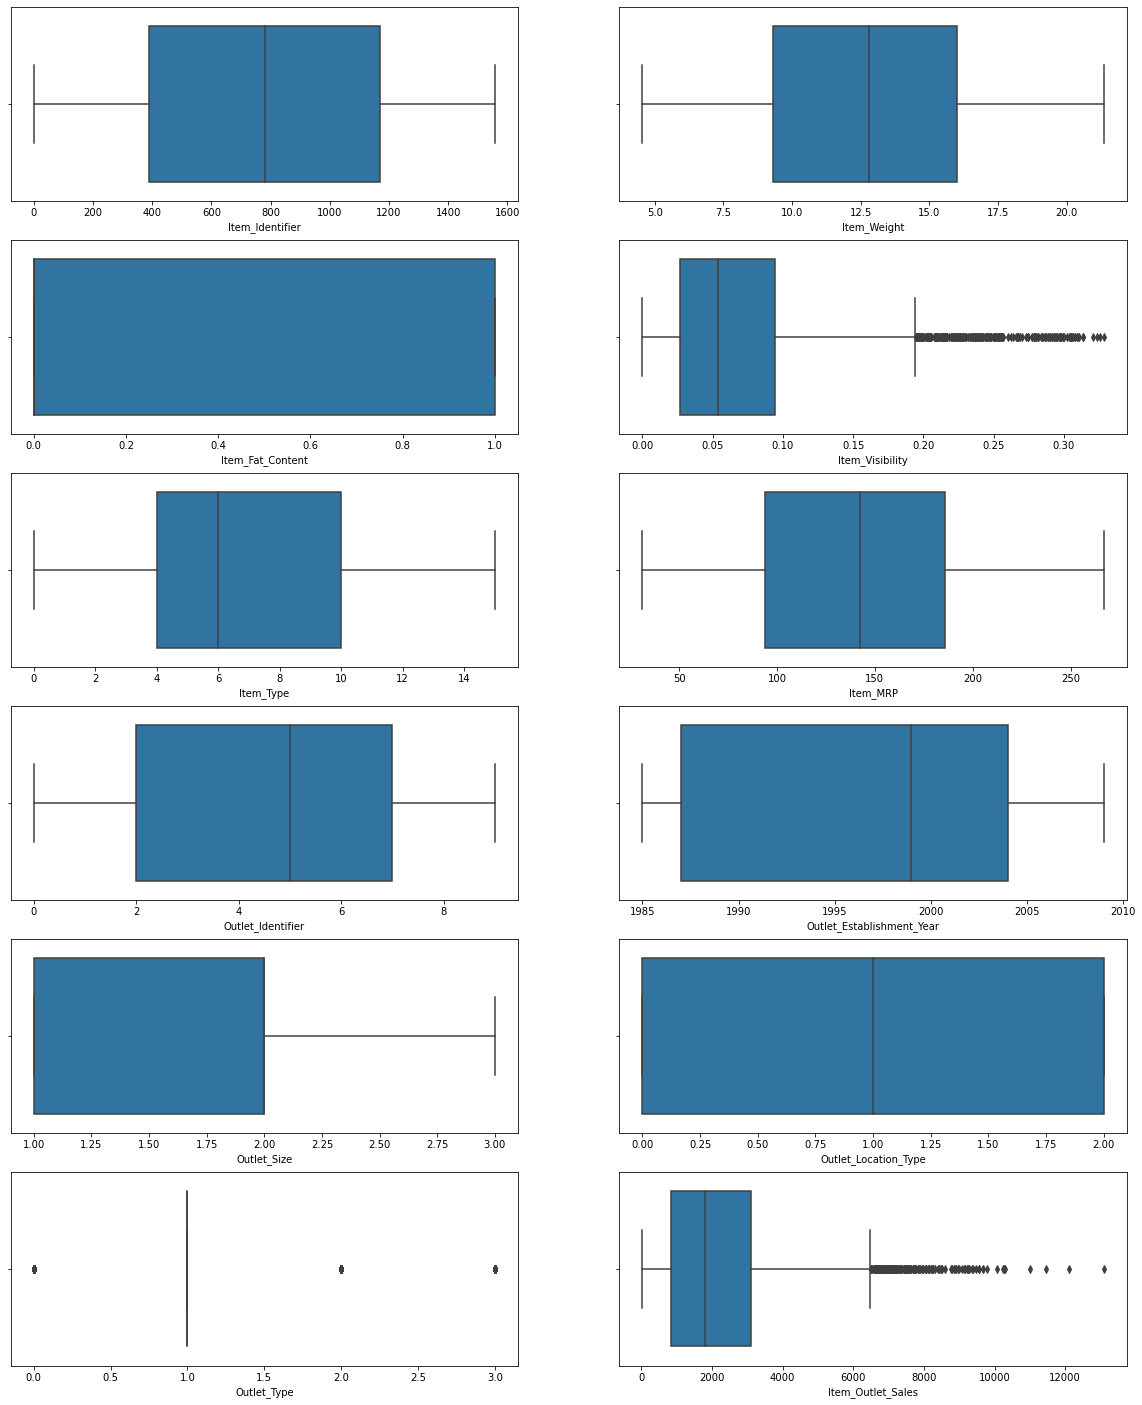

In [57]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

Only Item_Visibility, Outlet_Type and Item_outlet_sales has Outliers. We need to take care of Outliers in just one column which is Item_Visibility in remaining one is categorical and one is our target column

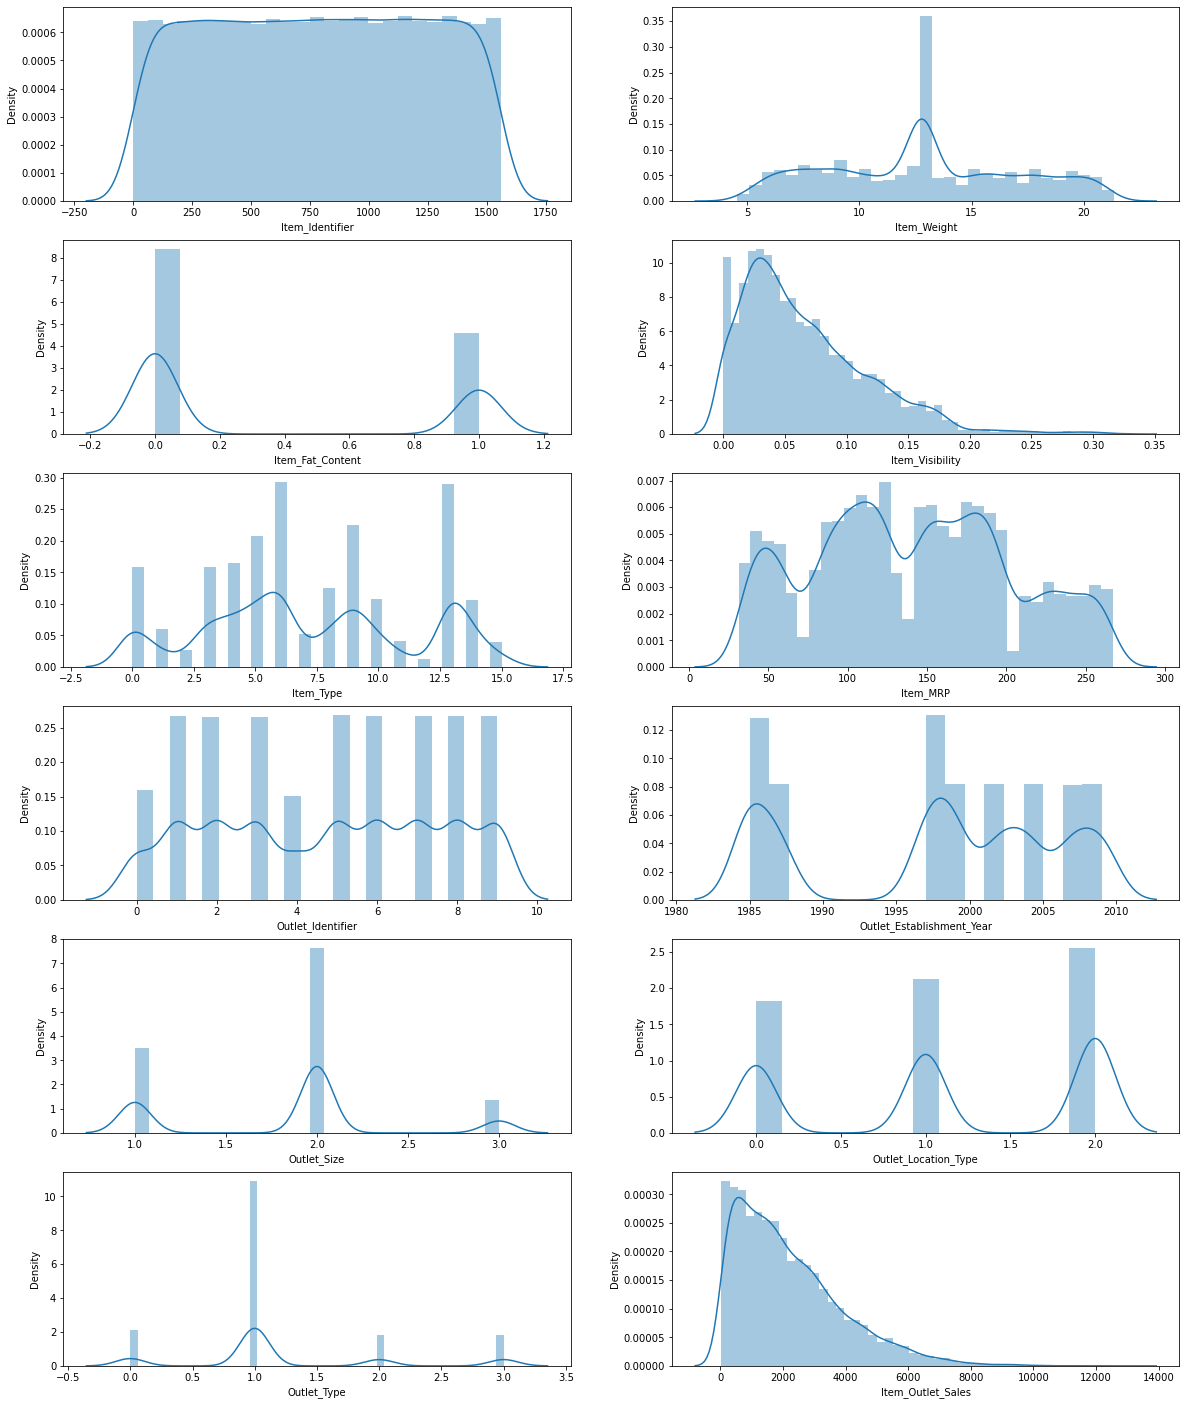

In [58]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

Only Item_visibilty has skewness

In [59]:
from scipy.stats import zscore

In [60]:
z_score = zscore(df["Item_Visibility"])

In [61]:
abs_z_score = np.abs(z_score)
filtered_entries = ((abs_z_score < 3 ) & (abs_z_score > -3 ))
new_df = df[filtered_entries]
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,156,9.30,0,0.016047,4,249.8092,9,1999,2.0,0,1,3735.1380,train
1,8,5.92,1,0.019278,14,48.2692,3,2009,2.0,2,2,443.4228,train
2,662,17.50,0,0.016760,10,141.6180,9,1999,2.0,0,1,2097.2700,train
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2.0,2,0,732.3800,train
4,1297,8.93,0,0.000000,9,53.8614,1,1987,3.0,2,1,994.7052,train


In [62]:
new_df.shape

(14031, 13)

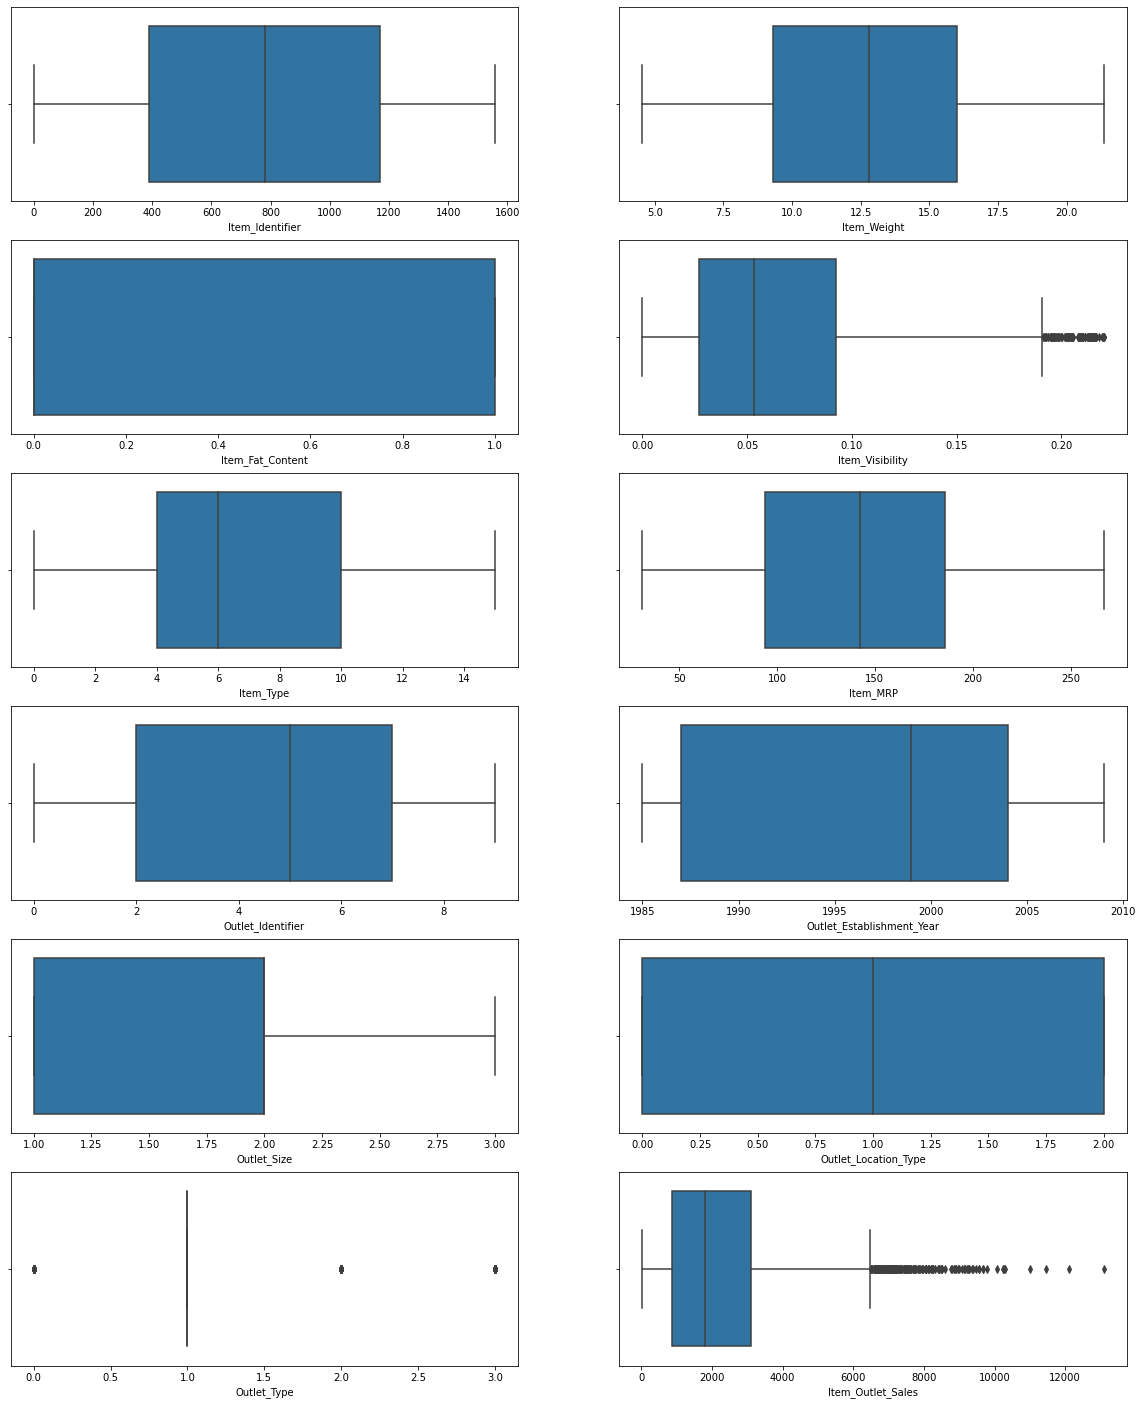

In [63]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [64]:
q1 = new_df.quantile(0.25)
q3 = new_df.quantile(0.75)
iqr = q3-q1

In [65]:
max=(q3["Item_Visibility"]+(1.5*iqr["Item_Visibility"]))
index=np.where(new_df["Item_Visibility"]>max)
new_df.drop(new_df.index[index],inplace=True,axis=0)

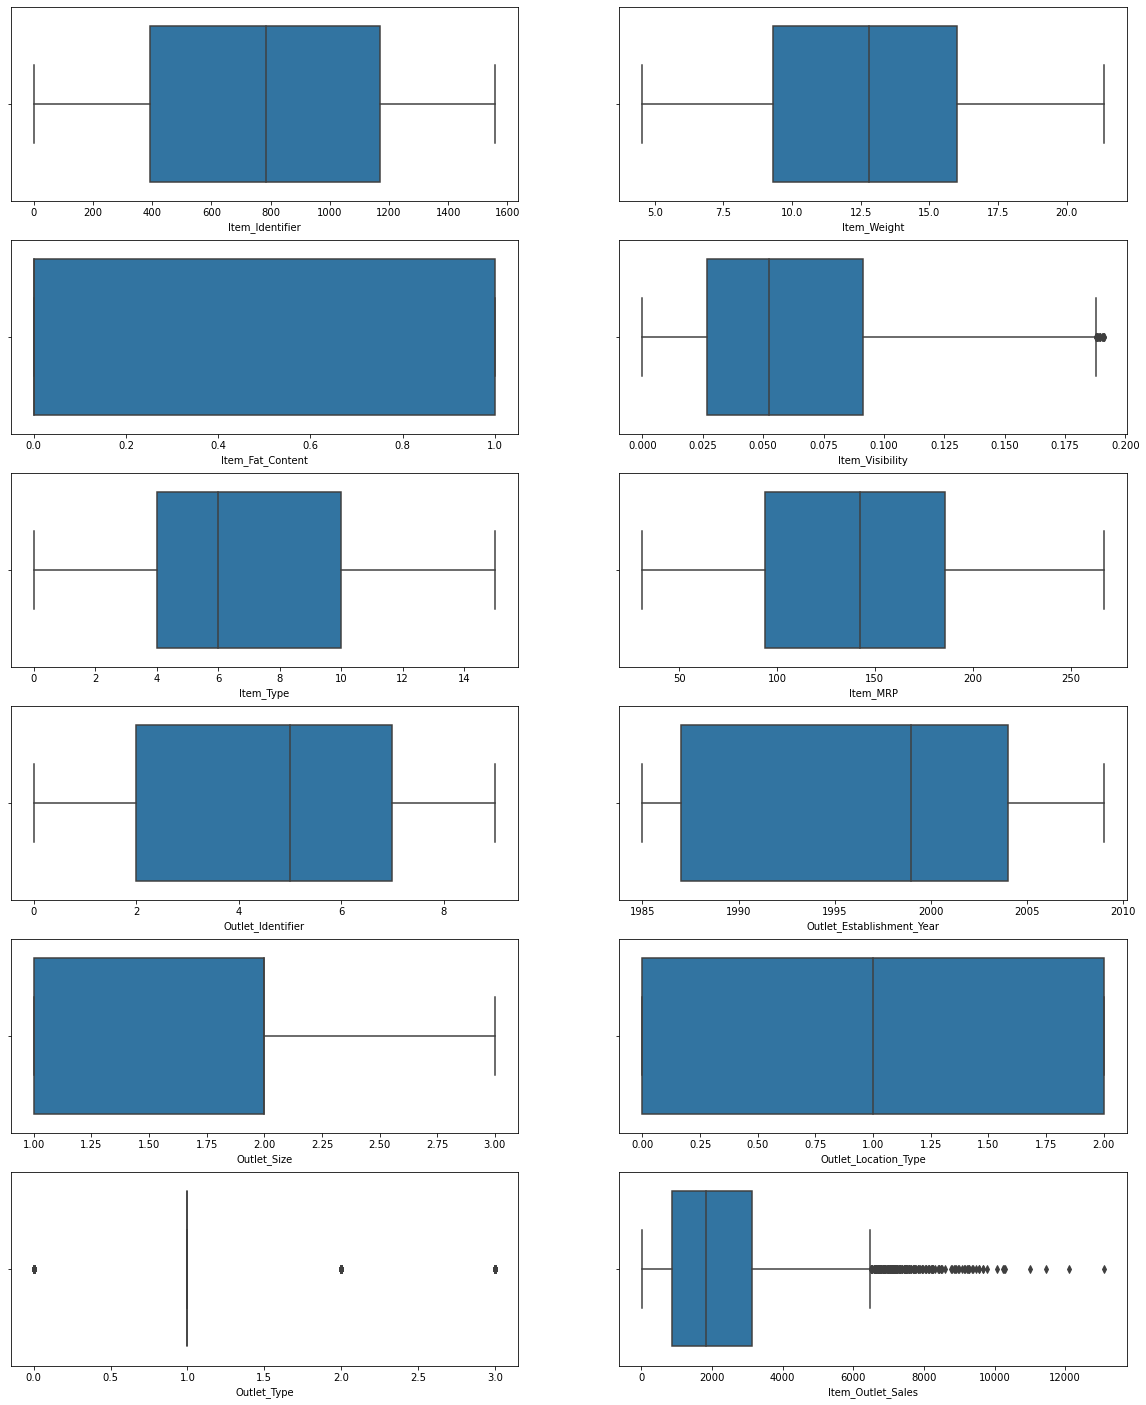

In [66]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [67]:
print("Dataloss is: ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100,"%")

Dataloss is:  2.4429738101943115 %


In [68]:
new_df.skew().to_frame()

,0
Item_Identifier,-0.008583
Item_Weight,0.111153
Item_Fat_Content,0.620060
Item_Visibility,0.728274
Item_Type,0.097579
Item_MRP,0.129289
Outlet_Identifier,-0.072207
Outlet_Establishment_Year,-0.415375
Outlet_Size,0.081470
Outlet_Location_Type,-0.212890


Item_Fat_Content, Outlet_Type is **categorical column**

Item_Visibilty still has skewness need to take care of and i am not Removing further Skewness using Quantile method anymore.

In [69]:
# Using Power Transformation to remove skewness and Taking care of outliers
from sklearn.preprocessing import PowerTransformer

In [70]:
trans = PowerTransformer()
new_df[["Item_Visibility"]] = trans.fit_transform(new_df[["Item_Visibility"]])

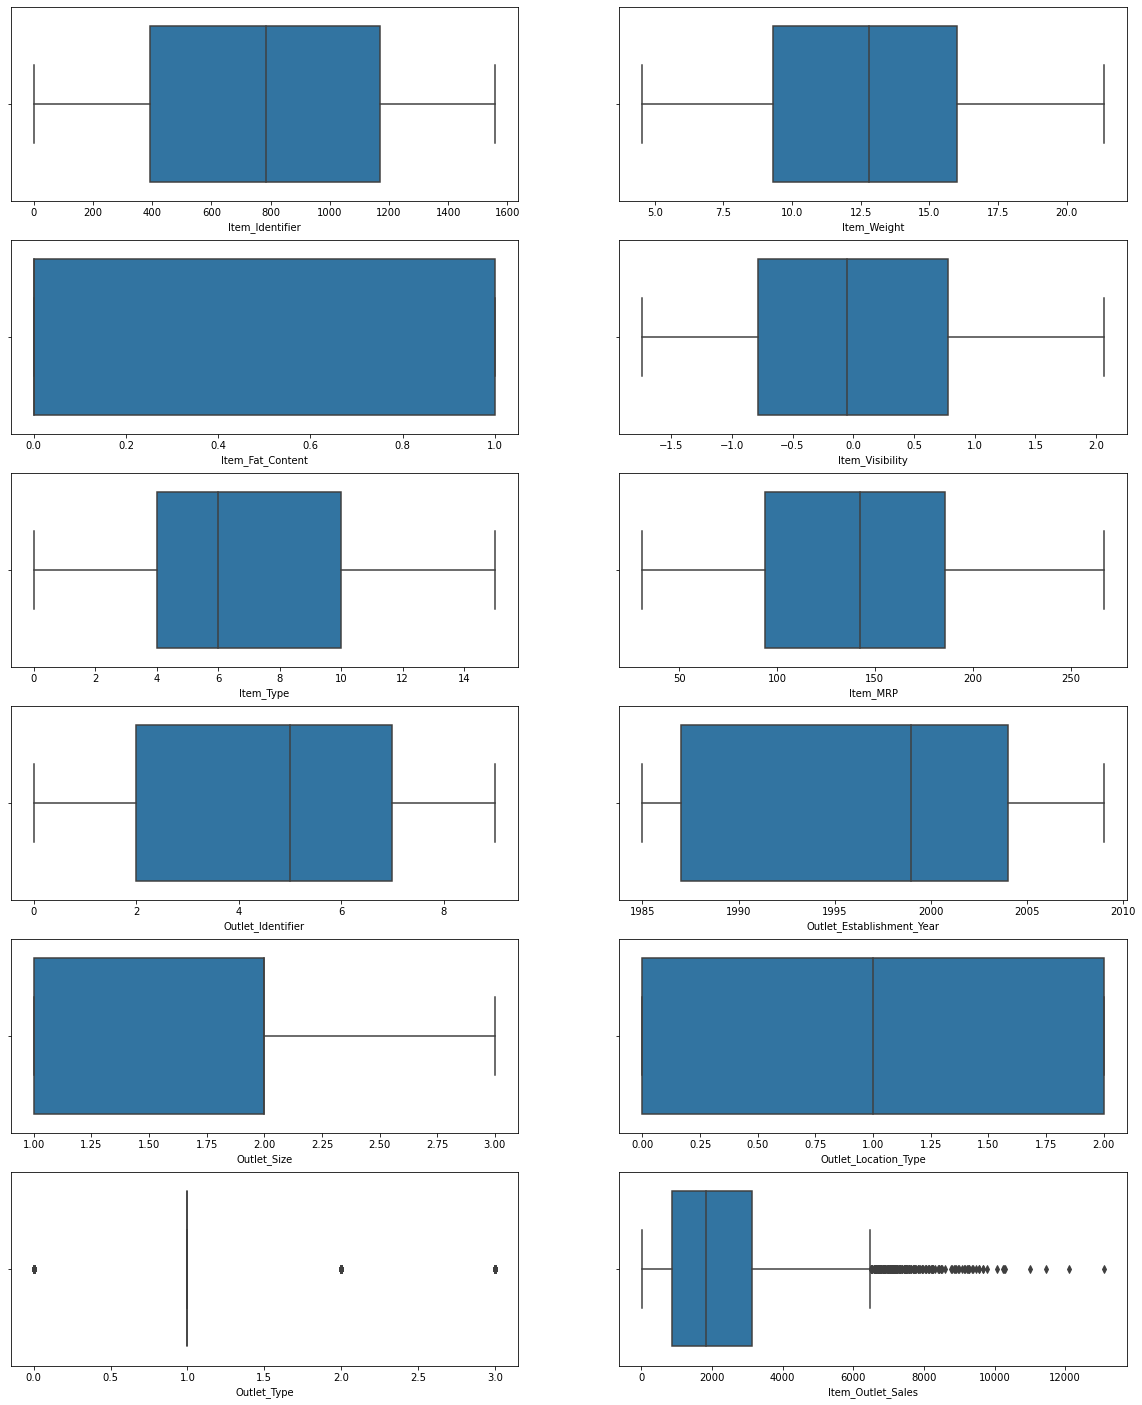

In [71]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

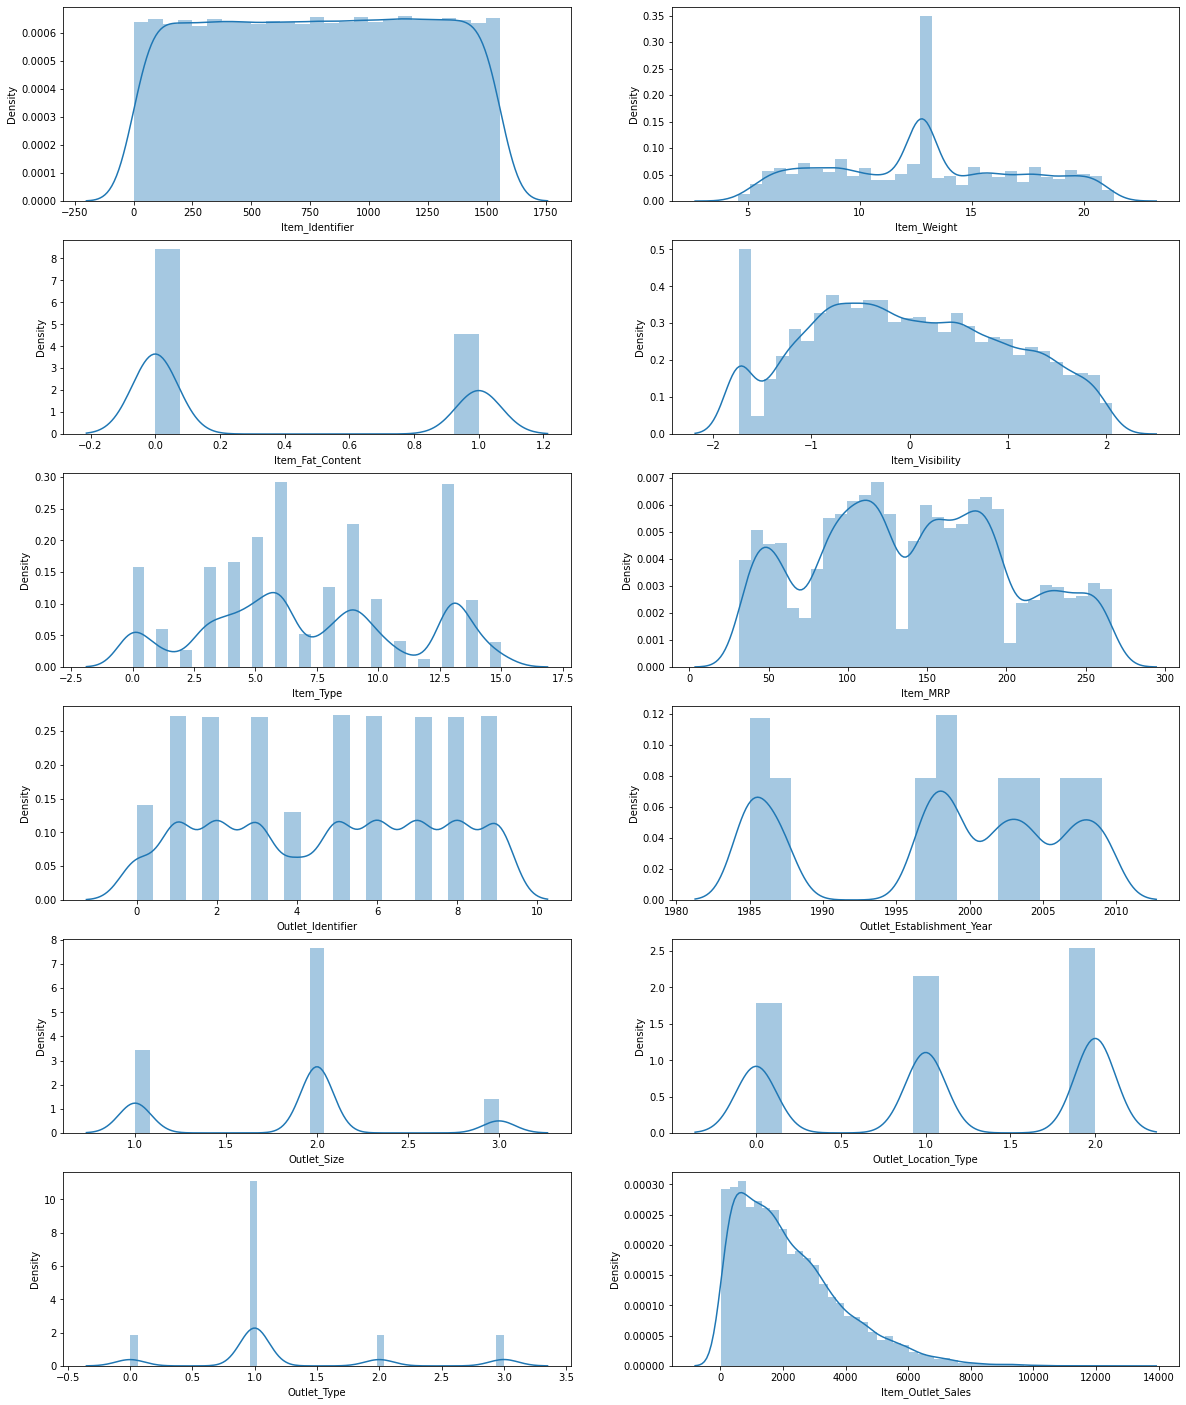

In [72]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 13:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

Skewness is completely taken care. So procedding ahead to splitting data again which i merge earlier

### Splitting the data

In [73]:
train = new_df[new_df["data"]=="train"]
del train["data"]

In [74]:
test = new_df[new_df["data"]=="test"]
del test["data"]
del test["Item_Outlet_Sales"]

In [115]:
x = train.drop(columns=["Item_Outlet_Sales","Item_Identifier",],axis=1)
y=train["Item_Outlet_Sales"]

In [116]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

### Searching for Best Model to pass the testing dataset

In [307]:
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)

In [308]:
max_accu = 0
max_RS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = GradientBoostingRegressor()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.6147270874246928


In [309]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=0)

## GradientBoostingRegressor

In [310]:
gbr = GradientBoostingRegressor()

In [311]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [312]:
# checking model understanding of data
gbr.score(x_train,y_train)

0.6236016609199506

In [313]:
y_pred = gbr.predict(x_test)

In [314]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(gbr,x_scaled,y,cv=5).mean())

r2_score : 0.607006327063988 
Cross validation Score : 0.5859850158773953


In [315]:
diff = []
r2score=[]
cv = []

r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(gbr,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(gbr,x_scaled,y,cv=5).mean())

diff.append(r - c)

### Randomforest Regressor

In [316]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [317]:
# checking model understanding of data
rf.score(x_train,y_train)

0.9346097496875175

In [318]:
y_pred = rf.predict(x_test)

In [319]:
print("\tr2_score :",r2_score(y_test,y_pred),"\n","="*60,"\n\tCross validation Score :",cross_val_score(rf,x_scaled,y,cv=5).mean())

	r2_score : 0.5738168447462606 
	Cross validation Score : 0.5430865028894178


In [320]:
r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(rf,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(rf,x_scaled,y,cv=5).mean())

diff.append(r - c)

### Bagging Regressor

In [321]:
bag_reg = BaggingRegressor()

In [322]:
bag_reg.fit(x_train,y_train)

BaggingRegressor()

In [323]:
bag_reg.score(x_train,y_train)

0.9145147111579406

In [324]:
y_pred = bag_reg.predict(x_test)

In [325]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(bag_reg,x_scaled,y,cv=5).mean())

r2_score : 0.5305159147230278 
Cross validation Score : 0.50854984121716


In [326]:
r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(bag_reg,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(bag_reg,x_scaled,y,cv=5).mean())

diff.append(r - c)

### AdaBoost

In [327]:
ada = AdaBoostRegressor()

In [328]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [329]:
# checking model understanding of data
ada.score(x_train,y_train)

0.44668531071678486

In [330]:
y_pred = bag_reg.predict(x_test)

In [331]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(ada,x_scaled,y,cv=5).mean())

r2_score : 0.5305159147230278 
Cross validation Score : 0.46909266911518577


In [332]:
r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(ada,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(ada,x_scaled,y,cv=5).mean())

diff.append(r - c)

## KNeighbors Regressor

In [333]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [334]:
# checking model understanding of data
knn.score(x_train,y_train)

0.6659414989155574

In [335]:
y_pred = knn.predict(x_test)

In [336]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(knn,x_scaled,y,cv=5).mean())

r2_score : 0.5185613235850975 
Cross validation Score : 0.4956396770057315


In [337]:
r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(knn,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(knn,x_scaled,y,cv=5).mean())

diff.append(r - c)

### Linear Regression

In [338]:
lr = LinearRegression()

In [339]:
lr.fit(x_train,y_train)

LinearRegression()

In [340]:
#Checking the model understanding
lr.score(x_train,y_train)

0.500944801424595

In [341]:
y_pred = lr.predict(x_test)

In [342]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(lr,x_scaled,y,cv=5).mean())

r2_score : 0.5139806083768089 
Cross validation Score : 0.5029685441698716


In [343]:
r = r2_score(y_test,y_pred)
r2score.append(r2_score(y_test,y_pred))

c = cross_val_score(lr,x_scaled,y,cv=5).mean()
cv.append(cross_val_score(lr,x_scaled,y,cv=5).mean())

diff.append(r - c)

In [344]:
Model = ["GradientBoosting","RandomForest","BaggingRegressor","AdaBoost","KNN","Linear Regression"]

In [345]:
# Building a dataframe
Best_model = pd.DataFrame({"MOdels":Model,
                          "Accuracy(r2_score)":r2score,
                          "Cross validation score":cv,
                          "Difference":diff})
Best_model

,MOdels,Accuracy(r2_score),Cross validation score,Difference
0,GradientBoosting,0.607006,0.586076,0.021056
1,RandomForest,0.573817,0.542718,0.032318
2,BaggingRegressor,0.530516,0.503030,0.029026
3,AdaBoost,0.530516,0.485567,0.049615
4,KNN,0.518561,0.495640,0.022922
5,Linear Regression,0.513981,0.502969,0.011012


### Removed the Item_Identifier it didn't affect model Accuracy. Also remove the Item_weight it affect accuracy a very very little so keeping it in model building and predictions

Linear regression has the least difference it's .011012

## Hyperparameter Tuning :-

In [296]:
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [297]:
params = {"fit_intercept":[True,False],
         "normalize":[True,False],
         "copy_X":[True,False]}

In [298]:
grid_search = GridSearchCV(lr,param_grid=params,cv=10)

In [299]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [301]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [302]:
lr = LinearRegression(copy_X=True,fit_intercept=True,normalize=True)

In [303]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [304]:
y_pred = lr.predict(x_test)

In [305]:
print("r2_score :",r2_score(y_test,y_pred),"\n","="*60,"\nCross validation Score :",cross_val_score(lr,x_scaled,y,cv=5).mean())

r2_score : 0.513980608376809 
Cross validation Score : 0.5029685441698716


## Model Saving,Loading and passing the test dataset

In [354]:
# saving model
import pickle

pickle.dump(lr, open("Big_data.pk1","wb"))

In [355]:
# loading Model
load_model = pickle.load(open("Big_data.pk1","rb"))

In [362]:
# dropping the column
test.drop("Item_Identifier",axis=1,inplace=True)# Need to pass the same column as i passed in during model building

#### passing testing dataset

In [364]:
# Passing the test dataset
y_test_pred = load_model.predict(scale.fit_transform(test))

In [370]:
# saving the predicted data as a dataframe
y_act_pred = pd.DataFrame(y_test_pred)## converting it into dataframe

In [373]:
# saving it to the csv file for further usage
y_act_pred.to_csv("big_data_testing_prediction")#saving file to csv